In [2]:
import pandas as pd
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
stopwords = stopwords.words("english")

In [3]:
df = pd.read_csv("data.csv", encoding='utf8')
rdf = pd.read_csv("reddit_politics.csv", encoding = 'utf8')
# removing bad entries
rdf = rdf[rdf.title != "comment"]
newsdf = pd.read_csv("Amalgamated_Data_File.csv")
blazedf = pd.read_csv("BlazeTV_Data_Descriptions.csv")
blazedf['title']=blazedf['title'].astype(str) 
cnndf = pd.read_csv("CNN_Data_Descriptions.csv")
cnndf['title']=cnndf['title'].astype(str) 
cnndf['title'] = cnndf['title'].str.replace('CNN', '')
nbcdf = pd.read_csv("NBC_Data_Descriptions.csv")
nbcdf['title']=nbcdf['title'].astype(str) 
pbsdf = pd.read_csv("PBS_Data_Descriptions.csv")
pbsdf['title']=pbsdf['title'].astype(str) 
# removing bad entries
pbsdf = pbsdf[pbsdf["title"].str.contains("Stream your PBS favorites")==False]
fdf = pd.read_csv("FoxNews_Data_Descriptions.csv")
fdf['title']=fdf['title'].astype(str)

In [1]:
print(df.columns)
print(rdf.columns)


NameError: name 'df' is not defined

In [4]:
#Cleaning Data

# removing punctuation
def remove_punct(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df['no_punctuation'] = df['title'].apply(remove_punct)
df['no_punctuation']

rdf['no_punctuation'] = rdf['title'].apply(remove_punct)
rdf['no_punctuation']

newsdf['no_punctuation'] = newsdf['title'].apply(remove_punct)
newsdf['no_punctuation']


blazedf['no_punctuation'] = blazedf['title'].apply(remove_punct)
blazedf['no_punctuation']

cnndf['no_punctuation'] = cnndf['title'].apply(remove_punct)
cnndf['no_punctuation']

nbcdf['no_punctuation'] = nbcdf['title'].apply(remove_punct)
nbcdf['no_punctuation']

pbsdf['no_punctuation'] = pbsdf['title'].apply(remove_punct)
pbsdf['no_punctuation']

fdf['no_punctuation'] = fdf['title'].apply(remove_punct)
fdf['no_punctuation']



0        Florida Gov DeSantis trolls President Biden wi...
1        White House press secretary Jen Psaki speaks t...
2        The Outnumbered cohost blasted the vice presid...
3        Fox News Bryan Llenas investigates the flood o...
4        The judge in the Kyle Rittenhouse case has yet...
                               ...                        
19995    Ohio Democrat Rep Tim Ryan says he and other D...
19996    South Carolina Republican Sen Lindsey Graham s...
19997    Power Player of the Week Educated author Tara ...
19998    Members of the bipartisan border security conf...
19999    Acting White House chief of Staff Mick Mulvane...
Name: no_punctuation, Length: 20000, dtype: object

In [10]:
df['no_punctuation_lowercase'] = df['no_punctuation'].apply(lambda x: x.lower())

rdf['no_punctuation_lowercase'] = rdf['no_punctuation'].apply(lambda x: x.lower())

newsdf['no_punctuation_lowercase'] = newsdf['no_punctuation'].apply(lambda x: x.lower())

blazedf['no_punctuation_lowercase'] = blazedf['no_punctuation'].apply(lambda x: x.lower())

cnndf['no_punctuation_lowercase'] = cnndf['no_punctuation'].apply(lambda x: x.lower())

nbcdf['no_punctuation_lowercase'] = nbcdf['no_punctuation'].apply(lambda x: x.lower())

pbsdf['no_punctuation_lowercase'] = pbsdf['no_punctuation'].apply(lambda x: x.lower())

fdf['no_punctuation_lowercase'] = fdf['no_punctuation'].apply(lambda x: x.lower())


0        florida gov desantis trolls president biden wi...
1        white house press secretary jen psaki speaks t...
2        the outnumbered cohost blasted the vice presid...
3        fox news bryan llenas investigates the flood o...
4        the judge in the kyle rittenhouse case has yet...
                               ...                        
19995    ohio democrat rep tim ryan says he and other d...
19996    south carolina republican sen lindsey graham s...
19997    power player of the week educated author tara ...
19998    members of the bipartisan border security conf...
19999    acting white house chief of staff mick mulvane...
Name: no_punctuation_lowercase, Length: 20000, dtype: object

In [11]:
# Removing stopwords
def remove_stopwords(text):
    global stopwords
    new = []
    #print(word_tokenize(text))
    for el in word_tokenize(text):
        if not el in stopwords:
            new.append(el)
    return ' '.join(new)

df['no_punctuation_no_stopwords'] = df['no_punctuation_lowercase'].apply(remove_stopwords)

rdf['no_punctuation_no_stopwords'] = rdf['no_punctuation_lowercase'].apply(remove_stopwords)

newsdf['no_punctuation_no_stopwords'] = newsdf['no_punctuation_lowercase'].apply(remove_stopwords)


blazedf['no_punctuation_no_stopwords'] = blazedf['no_punctuation_lowercase'].apply(remove_stopwords)

cnndf['no_punctuation_no_stopwords'] = cnndf['no_punctuation_lowercase'].apply(remove_stopwords)

nbcdf['no_punctuation_no_stopwords'] = nbcdf['no_punctuation_lowercase'].apply(remove_stopwords)

pbsdf['no_punctuation_no_stopwords'] = pbsdf['no_punctuation_lowercase'].apply(remove_stopwords)

fdf['no_punctuation_no_stopwords'] = fdf['no_punctuation_lowercase'].apply(remove_stopwords)


In [12]:
# Stemming words. "speaker -> speak"
def stemm(text):
    stemmer = PorterStemmer(PorterStemmer.ORIGINAL_ALGORITHM)
    new = []
    for word in word_tokenize(text):
        new.append(stemmer.stem(word))
    return ' '.join(new)

df['stemmed'] = df['no_punctuation_no_stopwords'].apply(stemm)

rdf['stemmed'] = rdf['no_punctuation_no_stopwords'].apply(stemm)

newsdf['stemmed'] = newsdf['no_punctuation_no_stopwords'].apply(stemm)



blazedf['stemmed'] = blazedf['no_punctuation_no_stopwords'].apply(stemm)

cnndf['stemmed'] = cnndf['no_punctuation_no_stopwords'].apply(stemm)

nbcdf['stemmed'] = nbcdf['no_punctuation_no_stopwords'].apply(stemm)

pbsdf['stemmed'] = pbsdf['no_punctuation_no_stopwords'].apply(stemm)

fdf['stemmed'] = fdf['no_punctuation_no_stopwords'].apply(stemm)

In [13]:
# Lemmatization

def lematize(text):
    stemmer = WordNetLemmatizer()
    new = []
    for word in word_tokenize(text):
        new.append(stemmer.lemmatize(word))
    return ' '.join(new)

df['lematized'] = df['no_punctuation_no_stopwords'].apply(lematize)

rdf['lematized'] = rdf['no_punctuation_no_stopwords'].apply(lematize)


newsdf['lematized'] = newsdf['no_punctuation_no_stopwords'].apply(lematize)


blazedf['lematized'] = blazedf['no_punctuation_no_stopwords'].apply(lematize)


cnndf['lematized'] = cnndf['no_punctuation_no_stopwords'].apply(lematize)


nbcdf['lematized'] = nbcdf['no_punctuation_no_stopwords'].apply(lematize)

pbsdf['lematized'] = pbsdf['no_punctuation_no_stopwords'].apply(lematize)

fdf['lematized'] = fdf['no_punctuation_no_stopwords'].apply(lematize)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# In TfidfVectorizer we consider overall document weightage
# of a word. It helps us in dealing with most frequent words.
# Using it we can penalize them. TfidfVectorizer weights the
# word counts by a measure of how often they appear in the documents.
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from plotly.offline import iplot


In [15]:
# standart
import numpy as np
import pandas as pd 

from numpy.random import seed
seed(42)

# visualization
import matplotlib.pyplot as plt
from plotly.offline import iplot

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

# text
from googletrans import Translator
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
from string import punctuation
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# neural
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [19]:
сon_bigrams = get_top_n_gram(df[df['politicallean'] == "Conservative"]['lematized'],(2,2),10)
lib_bigrams = get_top_n_gram(df[df['politicallean'] == "Liberal"]['lematized'],(2,2),10)


all_bigrams = get_top_n_gram(df['lematized'], (2,2), 10)
print(all_bigrams)
# dfall = pd.DataFrame(all_bigrams, columns = ['Text', 'count', 'Liberal', 'Conservative'])
df1 = pd.DataFrame(сon_bigrams, columns = ['Text' , 'count'])

df1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='red', title='Top 10 Bigrams in Conservative titles',orientation='h')

df2 = pd.DataFrame(lib_bigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='green',title='Top 10 Bigrams in Liberal titles',orientation='h')


blaze_bigrams = get_top_n_gram(blazedf['lematized'], (2,2),10)

df3 = pd.DataFrame(blaze_bigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='green',title='Top 10 Bigrams in BlazeTV titles',orientation='h')


[('supreme court', 111), ('donald trump', 100), ('white house', 93), ('joe biden', 85), ('social democracy', 69), ('ron desantis', 60), ('elon musk', 55), ('fox news', 54), ('voting right', 52), ('new york', 50)]


In [87]:
def pmi(dff, x, y):
    df = dff.copy()
    df['f_x'] = df.groupby(x)[x].transform('count')
    df['f_y'] = df.groupby(y)[y].transform('count')
    df['f_xy'] = df.groupby([x, y])[x].transform('count')
    df['pmi'] = np.log(len(df.index) * df['f_xy'] / (df['f_x'] * df['f_y']) )
    return df

print(dfall)
print(сon_bigrams)
print(lib_bigrams)
# сon_bigrams['f_x'] = con_bigrams.groupby('Text')
# pmi(condf, condf['text'],)

               Text  count
0     supreme court    111
1      donald trump    100
2       white house     93
3         joe biden     85
4  social democracy     69
5      ron desantis     60
6         elon musk     55
7          fox news     54
8      voting right     52
9          new york     50
[('ron desantis', 48), ('donald trump', 44), ('elon musk', 42), ('joe biden', 41), ('truth social', 33), ('russian invasion', 33), ('ronald reagan', 32), ('state union', 31), ('invasion ukraine', 31), ('white house', 30)]
[('supreme court', 83), ('social democracy', 66), ('white house', 63), ('donald trump', 56), ('voting right', 52), ('social democrat', 47), ('fox news', 45), ('joe biden', 44), ('communist party', 37), ('working class', 34)]


In [30]:
# Fitting lematized data
X_train_lema, X_test_lema, y_train_lema, y_test_lema = train_test_split(df['lematized'], df['politicallean'], random_state = 0)
model_lema = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_lema.fit(X_train_lema, y_train_lema)
y_pred_lema = model_lema.predict(X_train_lema)

clf_report = classification_report(y_train_lema, y_pred_lema)
print('Classification report on train data')
print(clf_report)

y2_pred_lema = model_lema.predict(rdf.title)
print("Reddit r/Politics")
# print("Liberal:")
print("Liberal:", (y2_pred_lema == "Liberal").sum())
print("Conservative:", (y2_pred_lema == "Conservative").sum())

print()
y3_pred_lema = model_lema.predict(newsdf.title)
print("Amalgamated news data")
print("Liberal:", (y3_pred_lema == "Liberal").sum())
print("Conservative:",(y3_pred_lema == "Conservative").sum())

print()
y4_pred_lema = model_lema.predict(blazedf.title)
print("blazedf news data")
print("Liberal:", (y4_pred_lema == "Liberal").sum())
print("Conservative:",(y4_pred_lema == "Conservative").sum())

print()
y5_pred_lema = model_lema.predict(cnndf.title)
print("cnndf news data")
print("Liberal:", (y5_pred_lema == "Liberal").sum())
print("Conservative:",(y5_pred_lema == "Conservative").sum())

print()
y6_pred_lema = model_lema.predict(nbcdf.title)
print("nbcdf news data")
print("Liberal:", (y6_pred_lema == "Liberal").sum())
print("Conservative:",(y6_pred_lema == "Conservative").sum())

print()
y7_pred_lema = model_lema.predict(pbsdf.title)
print("pbsdf news data")
print("Liberal:", (y7_pred_lema == "Liberal").sum())
print("Conservative:",(y7_pred_lema == "Conservative").sum())

print()
y8_pred_lema = model_lema.predict(fdf.title)
print("Fox news data")
print("Liberal:", (y8_pred_lema == "Liberal").sum())
print("Conservative:",(y8_pred_lema == "Conservative").sum())

Classification report on train data
              precision    recall  f1-score   support

Conservative       0.96      0.54      0.69      3395
     Liberal       0.80      0.99      0.88      6245

    accuracy                           0.83      9640
   macro avg       0.88      0.77      0.79      9640
weighted avg       0.86      0.83      0.82      9640

Reddit r/Politics
Liberal: 27755
Conservative: 308

Amalgamated news data
Liberal: 80890
Conservative: 6509

blazedf news data
Liberal: 7327
Conservative: 90

cnndf news data
Liberal: 19518
Conservative: 482

nbcdf news data
Liberal: 19996
Conservative: 4

pbsdf news data
Liberal: 4537
Conservative: 17

Fox news data
Liberal: 51049
Conservative: 846


r/Politics


([<matplotlib.patches.Wedge at 0x17c27aa08d0>,
 [Text(-1.0993461888715155, 0.03792040365916776, 'Liberal'),
  Text(1.09934618942626, -0.03792038757663305, 'Conservative')])

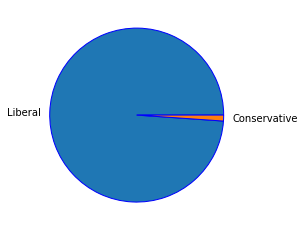

In [23]:
y2_lib = (y2_pred_lema == "Liberal").sum()
y2_con = (y2_pred_lema == "Conservative").sum()
total = len(y2_pred_lema)
labels = ['Liberal', 'Conservative']
slices = [y2_lib/total, y2_con/total]
colors = ['blue', 'red']
print("r/Politics")
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor' : 'blue'})

BlazeTV


([<matplotlib.patches.Wedge at 0x17c27aed9b0>,
 [Text(-1.070029380029471, 0.2550237751146868, 'Liberal'),
  Text(1.070029397937255, -0.2550236999771505, 'Conservative')])

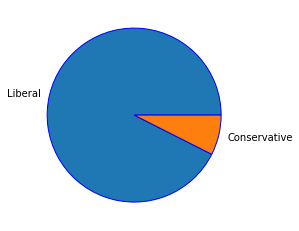

In [24]:
y3_lib = (y3_pred_lema == "Liberal").sum()
y3_con = (y3_pred_lema == "Conservative").sum()
total = len(y3_pred_lema)
labels = ['Liberal', 'Conservative']
slices = [y3_lib/total, y3_con/total]
colors = ['blue', 'red']
print("BlazeTV")
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor' : 'blue'})

CNN


([<matplotlib.patches.Wedge at 0x17c27b3ea58>,
 [Text(-1.0992008279827727, 0.04192302186134775, 'Liberal'),
  Text(1.0992008243029716, -0.04192311834379381, 'Conservative')])

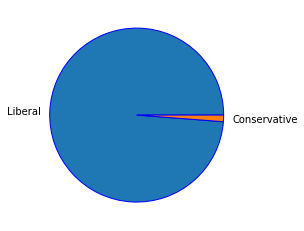

In [25]:
y4_lib = (y4_pred_lema == "Liberal").sum()
y4_con = (y4_pred_lema == "Conservative").sum()
total = len(y4_pred_lema)
labels = ['Liberal', 'Conservative']
slices = [y4_lib/total, y4_con/total]
colors = ['blue', 'red']
print("CNN")
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor' : 'blue'})

PBS


([<matplotlib.patches.Wedge at 0x17c27bdbb70>,
 [Text(-1.0968487036124515, 0.08320409475311381, 'Liberal'),
  Text(1.0968487021518019, -0.08320411400831107, 'Conservative')])

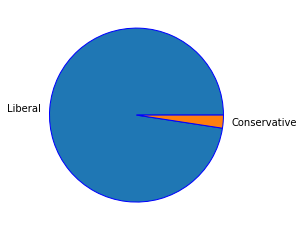

In [27]:
y5_lib = (y5_pred_lema == "Liberal").sum()
y5_con = (y5_pred_lema == "Conservative").sum()
total = len(y5_pred_lema)
labels = ['Liberal', 'Conservative']
slices = [y5_lib/total, y5_con/total]
colors = ['blue', 'red']
print("PBS")
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor' : 'blue'})

Fox


([<matplotlib.patches.Wedge at 0x17c2a1d6e10>,
 [Text(-1.0985576911995218, 0.05631162496657784, 'Liberal'),
  Text(1.0985576875748304, -0.05631169567897332, 'Conservative')])

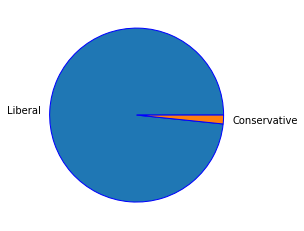

In [31]:
y8_lib = (y8_pred_lema == "Liberal").sum()
y8_con = (y8_pred_lema == "Conservative").sum()
total = len(y8_pred_lema)
labels = ['Liberal', 'Conservative']
slices = [y8_lib/total, y8_con/total]
colors = ['blue', 'red']
print("Fox")
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor' : 'blue'})

In [37]:
y_pred_lema = model_lema.predict(X_test_lema)

clf_report = classification_report(y_test_lema,y_pred_lema)
print('Classification report on test data')
print(clf_report)

Classification report on test data
              precision    recall  f1-score   support

Conservative       0.82      0.33      0.48      1140
     Liberal       0.72      0.96      0.83      2074

    accuracy                           0.74      3214
   macro avg       0.77      0.65      0.65      3214
weighted avg       0.76      0.74      0.70      3214



In [30]:
# Fitting stemmed data
X_train_stem, X_test_stem, y_train_stem, y_test_stem = train_test_split(df['stemmed'], df['PoliticalLean'], random_state = 0)
model_stem = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_stem.fit(X_train_stem, y_train_stem)
y_pred_stem = model_lema.predict(X_train_stem)

clf_report = classification_report(y_train_stem, y_pred_stem)
print('Classification report on train data')
print(clf_report)

Classification report on train data
              precision    recall  f1-score   support

Conservative       0.94      0.39      0.55      3395
     Liberal       0.75      0.99      0.85      6245

    accuracy                           0.78      9640
   macro avg       0.84      0.69      0.70      9640
weighted avg       0.81      0.78      0.75      9640



In [38]:
y_pred_stem = model_lema.predict(X_test_stem)

clf_report = classification_report(y_test_stem, y_pred_stem)
print('Classification report on test data')
print(clf_report)

Classification report on test data
              precision    recall  f1-score   support

Conservative       0.81      0.27      0.40      1140
     Liberal       0.71      0.97      0.82      2074

    accuracy                           0.72      3214
   macro avg       0.76      0.62      0.61      3214
weighted avg       0.74      0.72      0.67      3214

